# Internet Advertisements Data Set 
This dataset represents a set of possible advertisements on
   Internet pages.  The features encode the geometry of the image (if
   available) as well as phrases occuring in the URL, the image's URL and
   alt text, the anchor text, and words occuring near the anchor text.
   The task is to predict whether an image is an advertisement ("ad") or
   not ("nonad")

- http://archive.ics.uci.edu/ml/datasets/Internet+Advertisements

In [67]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [47]:
data_filename = "data/ad-dataset/ad.data"

In [48]:
df = pd.read_csv(data_filename,header=None)

/Users/rich/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [49]:
df.head()
df.info()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [50]:
#cleaning up the dataset - convert the strings to numerical do during dataframe load
def convert_number(x):
    try:
        return float(x)
    except ValueError:
        return np.nan

In [51]:
#make dictionary
converters = {}
for i in range(1558):
    converters[i] = convert_number

In [52]:
#encode target
converters[1558] = lambda x: 1 if x.strip() == "ad." else 0

In [53]:
df = pd.read_csv(data_filename, header=None, converters=converters)

In [54]:
df.head()
df.info()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,57.0,468.0,8.2105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,33.0,230.0,6.9696,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,60.0,468.0,7.8000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: float64(1558), int64(1)
memory usage: 39.0 MB


See the files ad.DOCUMENTATION and ad.names for info on the features.  For example the first three features are height, width and ratio of the image size.  Final feature is 1 if advert and 0 if not

In [55]:
#Simplification drop any row that has a Nan
df.dropna(inplace=True)
X = df.drop(1558,axis=1).values
y = df[1558]

In [56]:
#Try PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
Xd = pca.fit_transform(X)

In [57]:
np.set_printoptions(precision=3,suppress=True)
pca.explained_variance_ratio_
#first feature accounts for 85% of variance in dataset

array([ 0.854,  0.145,  0.001,  0.   ,  0.   ])

In [62]:
clf = DecisionTreeClassifier(random_state = 7);
scores_orig = cross_val_score(clf,X,y,scoring='accuracy')
scores_red = cross_val_score(clf,Xd,y,scoring='accuracy')
scores_orig
scores_red
#slightly higher performance with pca

array([ 0.942,  0.938,  0.941])

array([ 0.944,  0.934,  0.925])

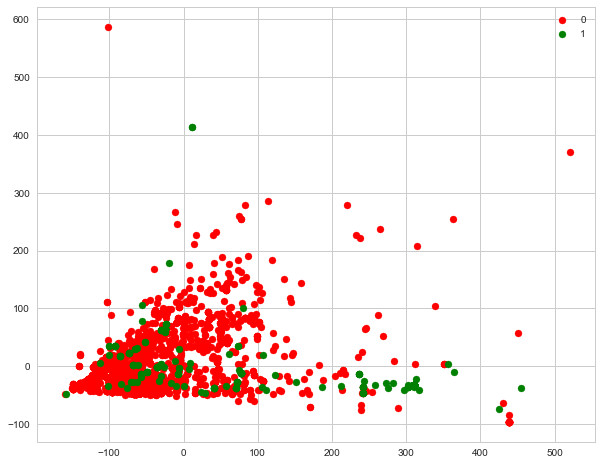

In [70]:
#plotting first two features from pca info
classes = set(y)
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
for cur_class, color in zip(classes, colors):
    mask = (y == cur_class).values
    plt.scatter(Xd[mask,0], Xd[mask,1], marker='o', color=color, label=int(cur_class));
plt.legend();
plt.show();

## Custom transformer

In [78]:
#implement a transformer
#take np array as input and discretize it based on mean
from sklearn.base import TransformerMixin
from sklearn.utils import as_float_array

class MeanDiscrete(TransformerMixin):
    def fit(self,X,y=None):
        X = as_float_array(X)
        self.mean = X.mean(axis=0)
        return self
    def transform(self,X,y=None):
        X = as_float_array(X)
        assert X.shape[1] == self.mean.shape[0]
        return X > self.mean

In [79]:
mean_discrete = MeanDiscrete()

In [80]:
X_mean = mean_discrete.fit_transform(X)

In [81]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('mean_discrete', MeanDiscrete()), ('classifier',DecisionTreeClassifier(random_state=7))])
scores_mean_discrete = cross_val_score(pipeline, X, y, scoring='accuracy')
print("Mean Discrete performance:{0:.3f}".format(scores_mean_discrete.mean()))

Mean Discrete performance:0.917


In [82]:
X_mean

array([[ True, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ..., 
       [ True, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)